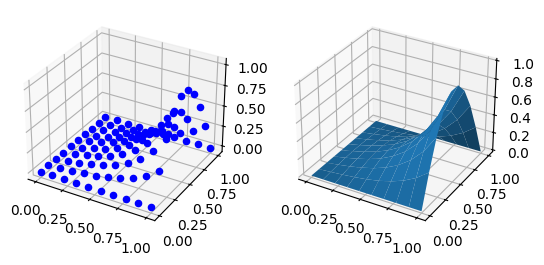

In [7]:
import numpy as np
import matplotlib.pyplot as plt

points = np.load('points.npy')

X = points[:, 0].reshape(10, 10)
Y = points[:, 1].reshape(10, 10)
Z = points[:, 2].reshape(10, 10)

Z /= np.max(Z)

fig, axs = plt.subplots(1, 2, subplot_kw={'projection': '3d'})

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        axs[0].scatter(X[i, j], Y[i, j], Z[i, j], color='b')


axs[1].plot_surface(X, Y, Z)
plt.show()

In [8]:
import torch
import torch.nn as nn

class PINN(nn.Module):
    def __init__(self):
        super(PINN, self).__init__()

        self.layers = nn.Sequential(
            nn.Linear(100, 200),
            nn.ReLU(),
            nn.Linear(200, 100),
            nn.ReLU(),
            nn.Linear(100, 100)
        )

    def forward(self, x):

        x = torch.flatten(x)
        return self.layers(x).reshape(10, 10)

# CL : nulles aux bords sauf en x=1

def loss_data(z, pred):
    loss = 0
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            loss += (z[i, j] - pred[i, j])**2

    return loss/(X.shape[0]*X.shape[1])

def loss_laplace(x, y, z, pred):
    # Calcul des dérivées via AutoDiff
    df_dx = torch.autograd.grad(pred, x, grad_outputs=torch.ones_like(f), create_graph=True)[0]
    d2f_dx2 = torch.autograd.grad(df_dx, x, grad_outputs=torch.ones_like(df_dx), create_graph=True)[0]

    df_dy = torch.autograd.grad(pred, y, grad_outputs=torch.ones_like(f), create_graph=True)[0]
    d2f_dy2 = torch.autograd.grad(df_dy, y, grad_outputs=torch.ones_like(df_dy), create_graph=True)[0]

    loss = torch.mean((d2f_dx2 + d2f_dy2)**2)

    return loss

def total_loss(x, y, z, pred):
    return loss_data(z, pred) + loss_laplace(x, y, z, pred)

